# Importing Libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MeanShift, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from scipy.optimize import curve_fit



In [2]:
class Clustering:
    def __init__(self,datasetpath):
        """
        Initializes the class with the given dataset and sets up default attributes.
        Parameters:
        ----------
        datasetpath(str):The file path to the CSV dataset to be loaded.
        Attributes:
        ----------
        df:The dataframe containing the loaded dataset.
        Wcss(list):A list to store Within-Cluster Sum of Squares (WCSS) values for clustering.
        Iteration(int):A counter to track the number of iterations or processes executed.
        cat_columns(list):A list to store the names of categorical columns in the dataset (initially empty).
        num_columns(list):A predefined list of numerical column names (default: ['Age', 'Income']).
        """
        self.df=pd.read_csv(datasetpath)
        self.Wcss=[]
        self.Iteration=0
        self.cat_columns=[]
        self.num_columns = ['Age','Income']
        
    def seeDataset(self):
        """
         This Method Provides access to the dataset stored in the dataframe.
        """

        return self.df 
    def DropColumn(self,feature):
        """
        This Method Remove Specific Column From The DataSet and Then Return Updated DataFrame

        Parameters:
        ----------
        feature : str
            The Column That Should be Delected From the Data Frame.
        """

        self.df=self.df.drop(columns=feature,axis=1)
        return self.df
    def MapCatogoriesToInteger(self):
        """
        Converts categorical columns to numeric by mapping unique categories to integers.
        """

        for col in self.df.columns:
            if self.df[col].dtype == 'object':
                # Use pd.factorize to map unique categories to integers
                self.df[col], _ = pd.factorize(self.df[col])
            
    def GeneralInfo(self):
        """ This Method Will help Us to Find General Info of our Dataset 
            1.info()
            2.describe()
        """
        print("Gaining Information on Dataset")
        
        print(self.df.info(),"\n")
        num_columns = ['ID','Age','Income']
        self.cat_columns = ['Sex','Marital status','Education','Occupation','Settlement size']

        self.df[self.cat_columns] = self.df[self.cat_columns].astype('str')
        print("Describe Method for Catagorical Features ")
        print(self.df.describe(include='object').T,"\n")
        print("Describe Method for Numerical Features ")
        print(self.df.describe().T,"\n") 
    
    def DescriptiveStatistics(self):
        """This Method will do Descriptive Statistics on DataSet 
        1.Mean
        2.Median
        3.Varience
        4.Standard Deviation
        """
        print("Mean of Numerical Features inside Dataset")
        print(self.df.mean(numeric_only=True),"\n")
        print("Median of Numerical Features inside Dataset")
        print(self.df.median(numeric_only=True),"\n")
        print("Varience of Numerical Features")
        print(self.df.var(numeric_only=True),"\n")
        print("Standard Deviation of Numerical Features")
        print(self.df.std(numeric_only=True),"\n")
        
    def DistributionMetrics(self):
        """This Method Help us To see the Probabilty Distribution 
        1.Skewness 
        2.kurtosis  
        """
        print("Skewness")
        print(self.df.skew(numeric_only=True),"\n")
        print("Kurtosis")
        print(self.df.kurtosis(numeric_only=True),"\n")
    def RelationshipAnalysis(self):
        """ This Method Finds Out  
        1.Correlation Matrix
        2.Covarience  
        """
        print("Correlation Matrix is ")
        print(self.df.corr(numeric_only=True),"\n")
        print("Covarience")
        print(self.df.cov(numeric_only=True),"\n")
        
    def OutlierAnalysis(self):
        """ This Method Calculate IQR (Interquartile Range) """
        
        Q1 = self.df['Income'].quantile(0.25)
        Q3 = self.df['Income'].quantile(0.75)
        IQR = Q3 - Q1
        outliers = self.df[(self.df['Income'] < (Q1 - 1.5 * IQR)) | (self.df['Income'] > (Q3 + 1.5 * IQR))]
        return outliers
    def CategoricalAnalysis(self):
        """ Calculate Frequency Count and Perform Some Group Statistics """
        print("Frequency Count of Genders","\n")
        print(self.df['Sex'].value_counts(),"\n")
        print("Average Income and Age by gender","\n")
        print(self.df.groupby('Sex')[['Income','Age']].mean(),"\n")
        print("Count of customers in age bins","\n")
        self.df['Age_Group'] = pd.cut(self.df['Age'], bins=[0, 20, 40, 60, 80], labels=['0-20', '20-40', '40-60', '60-80'])
        print(self.df['Age_Group'].value_counts(),"\n") 
        
    def BarChart(self):
        """ This Methods Plot Bar Charts of All Catogorical Features With one Another"""
        
        cat_aux = self.cat_columns.copy()
        for category1 in self.cat_columns:
            cat_aux.pop(0);
            for category2 in cat_aux:
                if category1 != category2:
                    plt.figure(figsize=(8,4))
                    sns.countplot(data=self.df, x=category1, hue=category2)
                    plt.title(
                        f'Bar Chart of {category1} grouped by {category2}',
                        fontsize=14,
                        weight='bold',
                        loc='center',
                        pad=20
                    )
                    plt.xlabel(category1, fontsize=12, weight='semibold')
                    plt.ylabel("Count", fontsize=12, weight='semibold')
                    
                    plt.xticks(fontsize=12, weight='semibold')
                    plt.yticks(fontsize=12, weight='semibold')
                    plt.tight_layout()
                    plt.show()
                    
    def PieChart(self):
        """ This Method Plot Piecharts of all Catogorical Features in our Dataset """
        
        for category in self.cat_columns:
            plt.figure(figsize=(4, 4))
            self.df[category].value_counts().plot.pie(
                autopct='%1.1f%%',  
                startangle=90,      
                colors=plt.cm.tab20.colors,  
                wedgeprops={'edgecolor': 'black'},  
                explode=[0.1 if i == 0 else 0 for i in range(self.df[category].nunique())]  
            )
            plt.title(f'Pie Chart of {category}')
            plt.ylabel('')  
            plt.tight_layout()
            plt.show()
        
    def LinePlot(self,x, y, hue):
        """ This Method plots Lineplots of Numerical Features Group by Catogorical Features 
        Parameters:
        ----------
            x (str): The name of the column to be plotted on the x-axis.
            y (str): The name of the column to be plotted on the y-axis.
            hue (str): The name of the categorical column to group the data by.
        
        """
        plt.figure(figsize=(8, 7))
        sns.lineplot(x=x, y=y, data=self.df, hue=hue, marker='o', alpha=0.85)
        plt.title(
            f'Scatter Plot of {y} vs {x} grouped by {hue}',
            fontsize=14,
            weight='bold',
            loc='center',
            pad=20
        )
        plt.xlabel(x, fontsize=12, weight='semibold')
        plt.ylabel(y, fontsize=12, weight='semibold')
        plt.xticks(fontsize=12, weight='semibold')
        plt.yticks(fontsize=12, weight='semibold')

        plt.grid(True, linestyle='--', alpha=0.7)
        
        # Customize the legend
        plt.legend(
            title=hue,
            title_fontsize=12,
            fontsize=10,
            loc='upper left',
            bbox_to_anchor=(1, 1)
        )
        
        # Tight layout
        plt.tight_layout()
        plt.show()

        
    def Scatter(self,x, y, hue):
        """ This Method Plots Scatter Plots of All Numerical Features Group by Catogorical Features 
         Parameters:
        ----------
            x (str): The name of the column to be plotted on the x-axis.
            y (str): The name of the column to be plotted on the y-axis.
            hue (str): The name of the categorical column to group the data by.
        
        """
        plt.figure(figsize=(6,6))
        sns.scatterplot(x=x, y=y, data=self.df, hue=hue, alpha=0.85)
        plt.title(
            f'Scatter Plot of {y} vs {x} grouped by {hue}',
            fontsize=14,
            weight='bold',
            loc='center',
            pad=20
        )

        plt.xlabel(x, fontsize=12, weight='semibold')
        plt.ylabel(y, fontsize=12, weight='semibold')
        plt.xticks(fontsize=12, weight='semibold')
        plt.yticks(fontsize=12, weight='semibold')
        
        
    def pairplot(self):
        """ This Method Help us to Plot Pairplot of Our Dataset """
        sns.pairplot(self.df, hue='Sex', diag_kind='kde', palette='tab10')
        plt.show()
    def OptimialCluster(self,numberofClusters=None,data=None):
        """ 
        This Method Find out Optimial Number of Clusters from Our Data Sample.It Calculate WCSS (Within-Cluster Sum of Squares)
        Parameters:
        ----------
        numberofClusters (int): The number of clusters to form.
        data (array-like): The dataset to cluster. 
        """
        if data is None:
            return "Didn't Get any Data,Pass Data as An argument "
        if numberofClusters is None:
            return "Didn't Get any cluster Number"
        else:
            km=KMeans(numberofClusters,n_init=10)
            prediction=km.fit_predict(data)
            self.Wcss.append(km.inertia_)
            return "Calculated WCSS (Within-Cluster Sum of Squares) "
        
    def ApplyKMeanClustering(self,numberofClusters=None,data=None):
        """ This Method Apply KMean Cluster Model.It take following Parameters as Input 
        Parameters:
        ----------
            numberofClusters (int): The number of clusters to form.
            data (array-like): The dataset to cluster.

        Returns:
        --------
            array: Cluster labels for each data point, or an error message if inputs are missing.
            
        """
        
        if data is None:
            return "Didn't Get any Data,Pass Data as An argument "
        if numberofClusters is None:
            return "Didn't Get any Clusters Number yet "
        else:
            km=KMeans(numberofClusters,n_init=10)
            prediction=km.fit_predict(data)
            return prediction
        
    def ElbowMethod(self):
        """ This Method Will Help us to Find Out How many optimial Clusters Are Required for Our Dataset """
        
        if len(self.Wcss)==0:
            return "You Didn't Call KMean Clustering Model Yet"
        
        else:
            plt.figure(figsize=(8, 6)) 
            plt.plot(range(1, self.Iteration), self.Wcss, marker='o', linestyle='--', color='b', label='WCSS') 
            plt.title("Elbow Method for Optimal Number of Clusters", fontsize=16, fontweight='bold')  
            plt.xlabel("Number of Clusters", fontsize=13,fontweight='bold')
            plt.ylabel("WCSS (Within-Cluster Sum of Squares)", fontsize=13,fontweight='bold')
            plt.grid(True, linestyle='--', alpha=0.7)  
            plt.xticks(range(1, 11))
            plt.legend(fontsize=12)
            self.Wcss=[]


            
    def Heatmap(self):
        """ This Method Plot Heatmap for correlations first Its Find Out Correlation Matrix """
         
        correlation_matrix = self.df.corr(numeric_only=True)
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title("Correlation Heatmap",fontsize=13,weight='bold')
        plt.xticks(fontsize=13,weight='bold')
        plt.yticks(fontsize=13,weight='bold')
        plt.show()        
        
    def PCA(self,Data,number_of_dimensions):
        """ This Method Perform Principal Component Analysis .It Take Data and number_of_dimensions as Input
        Parameters:
        ----------
            Data:DataFrame 
            number_of_Dimension(int):Desired Dimensions
        Return:
        ------
            New Desired Dimension DataFrame
        """
        pca = PCA(n_components=number_of_dimensions)
        X_pca = pca.fit_transform(Data)

        column_names = [f'Principal Component {i+1}' for i in range(number_of_dimensions)]

        X_pca_df = pd.DataFrame(X_pca, columns=column_names)
        return X_pca_df

        
    
    def PCA_2D_Scatter_Plot(self,X,labels,Title):
        """ This Method Plot 2D Scatter Plot.
        Parameters:
        ----------
        X: DataFrame,
        Labels : Cluster Color Apply on Plot,
        Title(Str):Give Plot a Title
        
        Return:
        ------
        2D Scatter Plot 
        
        """
        X = X.values if isinstance(X, pd.DataFrame) else X  

        fig = px.scatter(
            x=X[:, 0],  
            y=X[:, 1],  
            title=f"<b>Scatter Plot of {Title}</b>",  
            labels={'color': 'Clusters', 'x': '<b>X Axis Label</b>', 'y': '<b>Y Axis Label</b>'},  
            color=labels  
        )

        fig.update_layout(
            title_font=dict(size=20, family="Arial", color="black"),
            title=dict(x=0.5),  # Center the title
            xaxis_title='<b>X Axis Label</b>',  
            yaxis_title='<b>Y Axis Label</b>',  
            xaxis=dict(
                tickfont=dict(size=12, family="Arial", color="black", weight="bold")  # Bold x-ticks
            ),
            yaxis=dict(
                tickfont=dict(size=12, family="Arial", color="black", weight="bold")  # Bold y-ticks
            ),
            legend_title=dict(
                text='<b>Clusters</b>',  
                font=dict(size=14, color="black")
            )
        )

        fig.show()



    def PCA_3D_Scatter_Plot(self,X, labels, title):
        """ This Method Plot 3D Scatter Plot.
        Parameters:
        ----------
        X: DataFrame,
        labels : Cluster Color Apply on Plot,
        Title(Str):Give Plot a Title
        
        Return:
        ------
        3D Scatter Plot 
        
        """
        X = X.values if isinstance(X, pd.DataFrame) else X  

        fig = px.scatter_3d(
            X,
            x=X[:, 0],
            y=X[:, 1],
            z=X[:, 2],
            title=f"<b>Scatter Plot of {title}</b>",  
            labels={'color': 'Clusters'},  
            color=labels
        )

        fig.update_layout(
            title_font=dict(size=20, family="Arial", color="black"),
            title=dict(x=0.5), 
            scene=dict(
                xaxis_title='<b>X Axis Label</b>',
                yaxis_title='<b>Y Axis Label</b>',  
                zaxis_title='<b>Z Axis Label</b>',  
                xaxis=dict(tickfont=dict(size=12, family="Arial", color="black", weight="bold")), 
                yaxis=dict(tickfont=dict(size=12, family="Arial", color="black", weight="bold")),  
                zaxis=dict(tickfont=dict(size=12, family="Arial", color="black", weight="bold")) 
            ),
            legend_title=dict(
                text='<b>Clusters</b>',  
                font=dict(size=14, color="black")
            )
        )

        # Show the plot
        fig.show()


        
    def DBSCAN(self,df):
        """
        This Method Apply Density-Based Spatial Clustering of Applications with Noise 
        Parameters:
        ----------
        df(DataFrame):Data Frame to fit DBSCAN On.
        Return:
        ------
        dbscan_labels: Cluster Values
        """
        dbscan = DBSCAN(eps=10000, min_samples=100)  
        dbscan_labels = dbscan.fit_predict(df)
        return dbscan_labels
    
    def AgglomerativeClustering(self,df,numberofClusters):
        """
        This Method Apply AgglomerativeClustering
        Parameters:
        ----------
        df(DataFrame):Data Frame to fit AgglomerativeClustering On.
        numberofClusters(int):Number of Cluster
        Return:
        ------
        agglo_labels: Cluster Values
        """
        agglo = AgglomerativeClustering(n_clusters=numberofClusters, linkage='ward')
        agglo_labels = agglo.fit_predict(df)
        return agglo_labels
    def MeanShift(self,df):
        """
        This Method Apply MeanShift
        Parameters:
        ----------
        df(DataFrame):Data Frame to fit MeanShift On.
        Return:
        ------
        mean_shift_labels: Cluster Values
        
        """
        
        mean_shift = MeanShift(bandwidth=2000)  # Adjust bandwidth as needed
        mean_shift_labels = mean_shift.fit_predict(df)
        return mean_shift_labels
        
    def GaussianMixture(self,df,numberofClusters):
        """
        This Method Apply GaussianMixture
        Parameters:
        ----------
        df(DataFrame):Data Frame to fit GaussianMixture On.
        numberofClusters(int):Number of Cluster
        Return:
        ------
        gmm_labels: Cluster Values
        """
        gmm = GaussianMixture(n_components=numberofClusters, random_state=42)
         
        gmm_labels = gmm.fit_predict(df)
        return gmm_labels
    
    def SpectralClustering(self,df,numberofClusters):
        """
        This Method Apply SpectralClustering
        Parameters:
        ----------
        df(DataFrame):Data Frame to fit SpectralClustering On.
        numberofClusters(int):Number of Cluster
        Return:
        ------
        spectral_labels: Cluster Values
        """
        
        spectral = SpectralClustering(n_clusters=numberofClusters, affinity='nearest_neighbors', random_state=42)
        spectral_labels = spectral.fit_predict(df)
        return spectral_labels

        
    
    

            

# Passing Data to Class Constructor 

In [3]:
c1=Clustering("segmentation data.csv")

In [4]:
df=c1.seeDataset()

In [5]:
df=c1.DropColumn('ID')

In [6]:
df

Sex  Marital status  Age  Education  Income  Occupation  Settlement size
0       0               0   67          2  124670           1                2
1       1               1   22          1  150773           1                2
2       0               0   49          1   89210           0                0
3       0               0   45          1  171565           1                1
4       0               0   53          1  149031           1                1
...   ...             ...  ...        ...     ...         ...              ...
1995    1               0   47          1  123525           0                0
1996    1               1   27          1  117744           1                0
1997    0               0   31          0   86400           0                0
1998    1               1   24          1   97968           0                0
1999    0               0   25          0   68416           0                0

[2000 rows x 7 columns]

In [7]:
df=c1.MapCatogoriesToInteger()

# General Information

In [8]:
c1.GeneralInfo()



Gaining Information on Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB
None 

Describe Method for Catagorical Features 
                count unique top  freq
Sex              2000      2   0  1086
Marital status   2000      2   0  1007
Education        2000      4   1  1386
Occupation       2000      3   1  1113
Settlement size  2000      3   0   989 

Describe Method for Numerical Features 
         count        mean           std      min       25%       50%  \
Age     2000.0      35.909   

# DescriptiveStatistics

In [9]:
c1.DescriptiveStatistics()

Mean of Numerical Features inside Dataset
Age           35.909
Income    120954.419
dtype: float64 

Median of Numerical Features inside Dataset
Age           33.0
Income    115548.5
dtype: float64 

Varience of Numerical Features
Age       1.373444e+02
Income    1.452283e+09
dtype: float64 

Standard Deviation of Numerical Features
Age          11.719402
Income    38108.824679
dtype: float64 



# Distribution Metrics

In [10]:
c1.DistributionMetrics()

Skewness
Age       1.009940
Income    1.196085
dtype: float64 

Kurtosis
Age       0.479094
Income    2.874749
dtype: float64 



# RelationshipAnalysis

In [11]:
c1.RelationshipAnalysis()

Correlation Matrix is 
            Age   Income
Age     1.00000  0.34061
Income  0.34061  1.00000 

Covarience
                  Age        Income
Age        137.344391  1.521208e+05
Income  152120.807533  1.452283e+09 



# OutlierAnalysis

In [12]:
c1.OutlierAnalysis()

Sex Marital status  Age Education  Income Occupation Settlement size
18     1              1   44         2  261952          2               2
56     0              0   52         1  202575          2               2
63     0              0   25         0  227385          1               2
87     0              0   47         1  241068          1               1
95     0              0   58         2  268340          1               1
...   ..            ...  ...       ...     ...        ...             ...
1076   1              1   71         3  211572          2               1
1092   1              1   45         2  260847          2               2
1093   0              0   65         2  285647          2               2
1097   0              0   57         2  281647          2               1
1368   1              0   34         1   36760          0               0

[83 rows x 7 columns]

# CategoricalAnalysis

In [13]:
c1.CategoricalAnalysis()

Frequency Count of Genders 

0    1086
1     914
Name: Sex, dtype: int64 

Average Income and Age by gender 

            Income        Age
Sex                          
0    127775.225599  37.874770
1    112850.047046  33.573304 

Count of customers in age bins 

20-40    1404
40-60     458
60-80     107
0-20       31
Name: Age_Group, dtype: int64 



# Plotting 

# 1 Categorical Graphs

# 1.1 (Bar Chart)

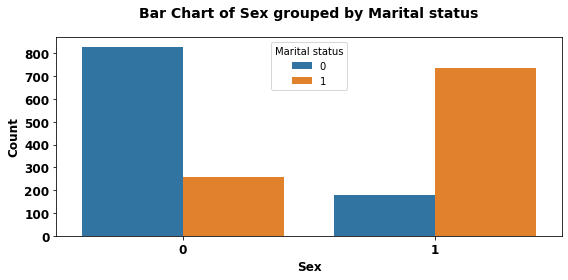

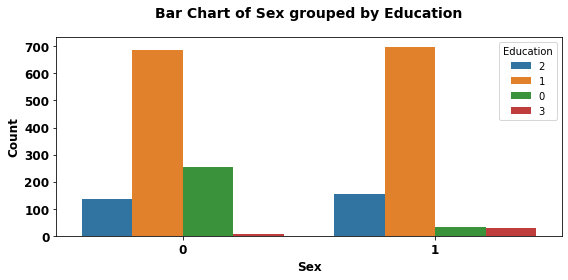

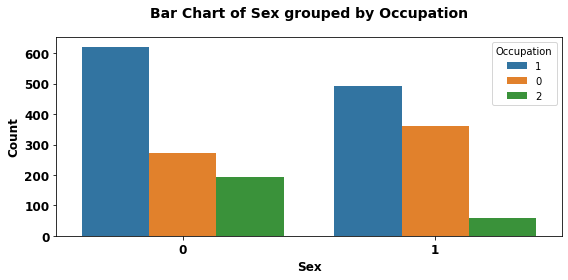

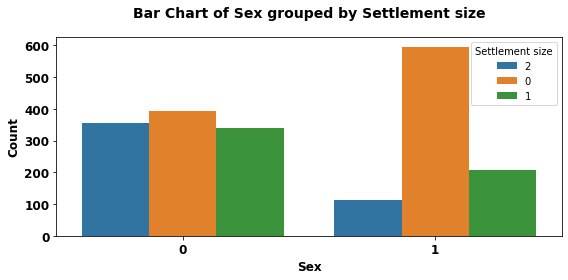

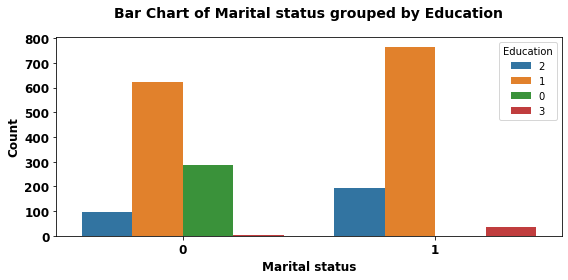

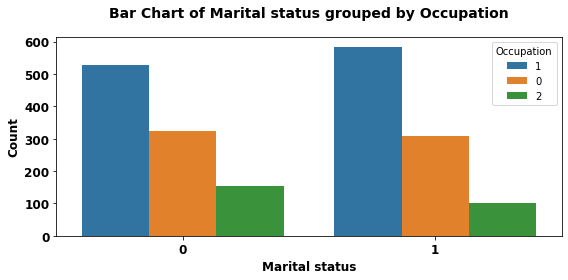

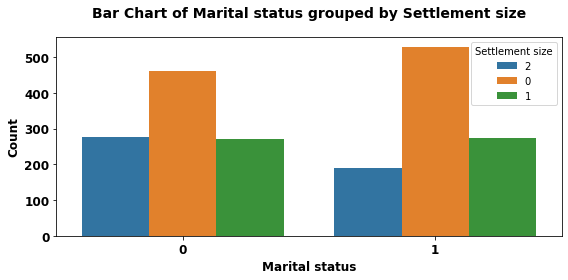

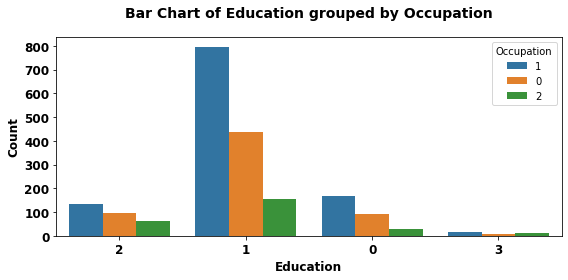

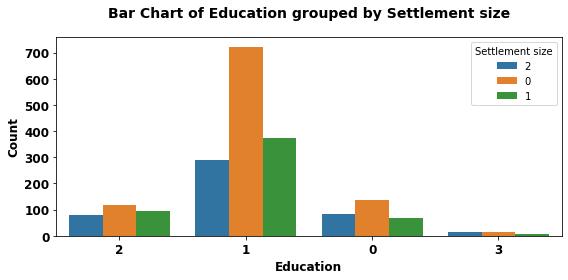

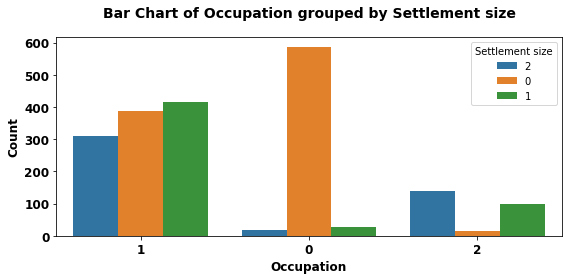

In [14]:
c1.BarChart()

# 1.2 (Pie Chart) (optional)

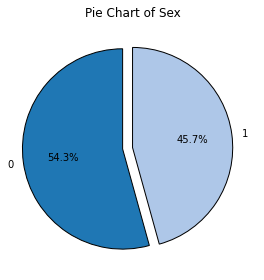

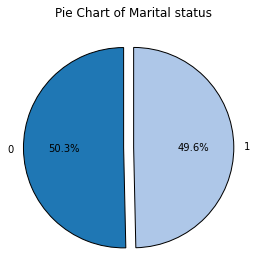

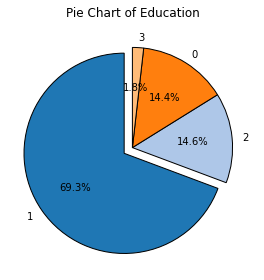

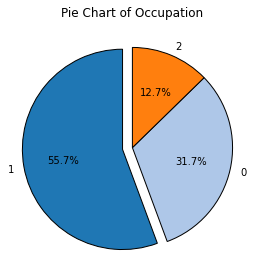

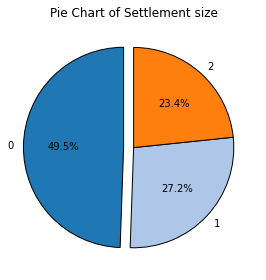

In [15]:
c1.PieChart()


# 2 Relational graph

# 2.1 (Line Plot)

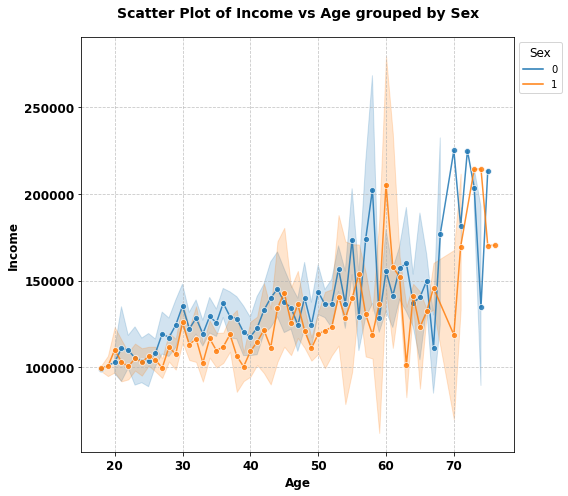

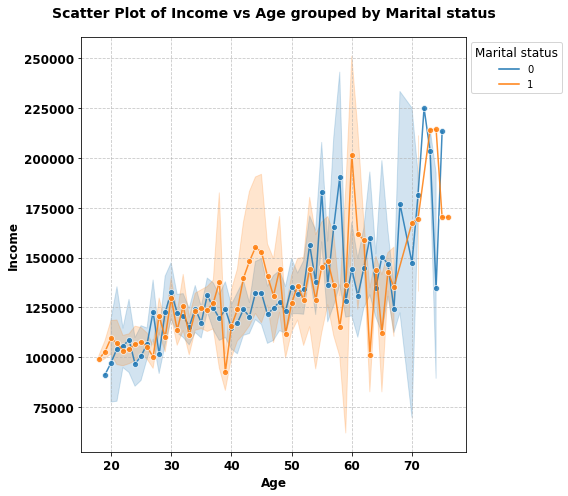

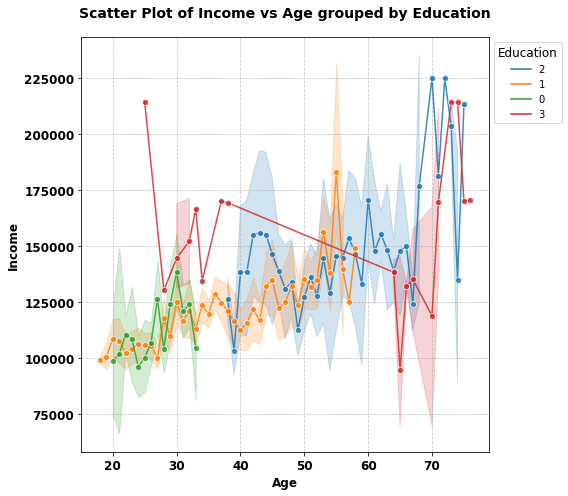

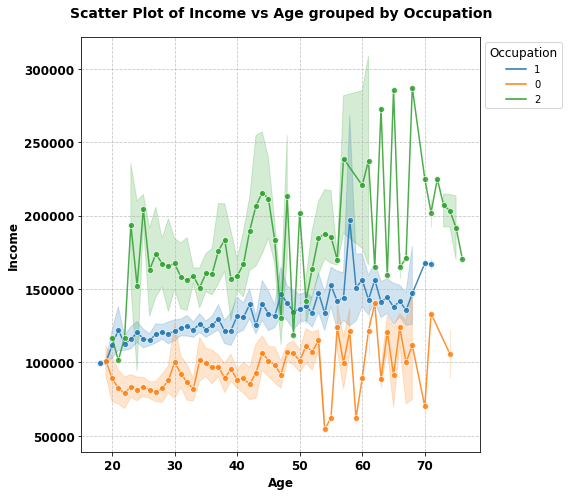

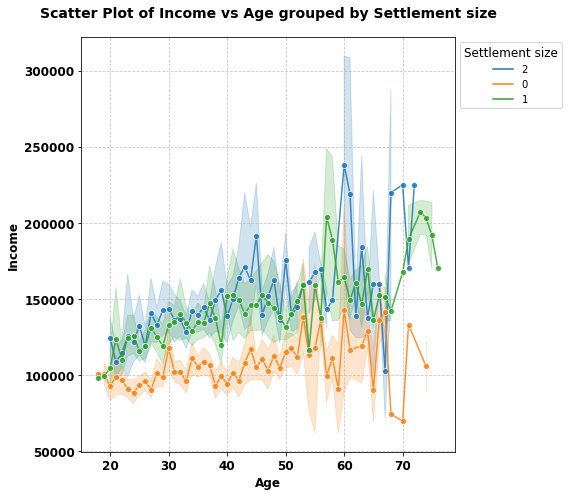

In [16]:
# Loop through categorical columns and plot
for cat in c1.cat_columns:
    c1.LinePlot('Age', 'Income', cat)

# 2.2 (Scatter Plots)

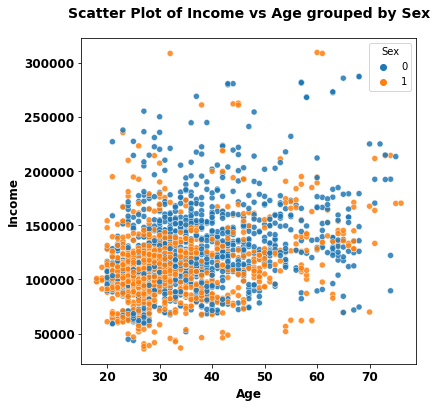

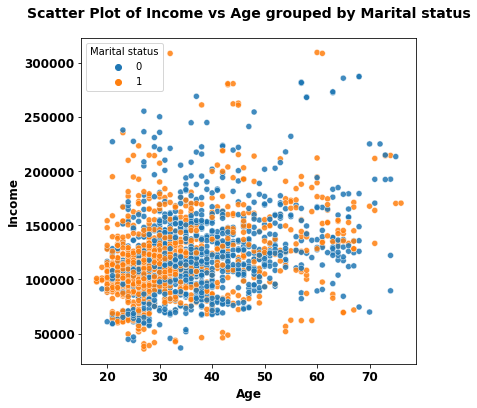

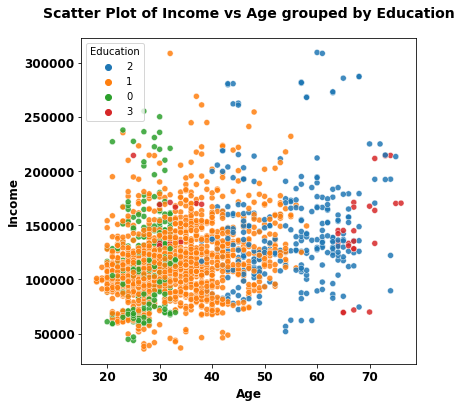

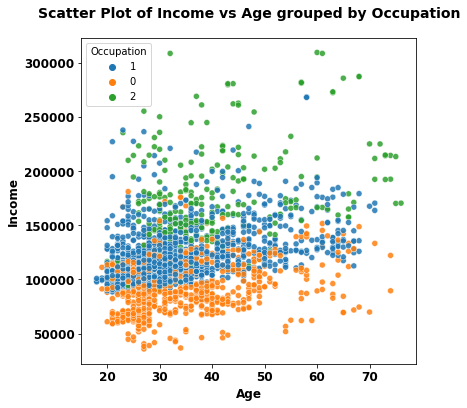

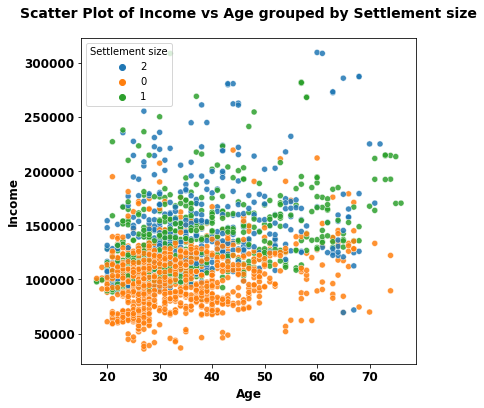

In [17]:
for cat in c1.cat_columns:
    c1.Scatter('Age', 'Income', cat)

# 3 Statistical Graph

# 3.1 (HeatMap Plot )

In [18]:
c1.MapCatogoriesToInteger()

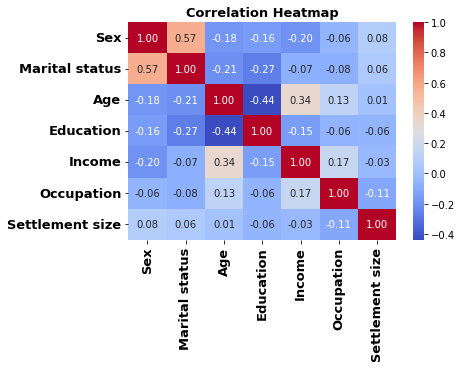

In [19]:

c1.Heatmap()


# 3.2 ( Pair Plot) Optional

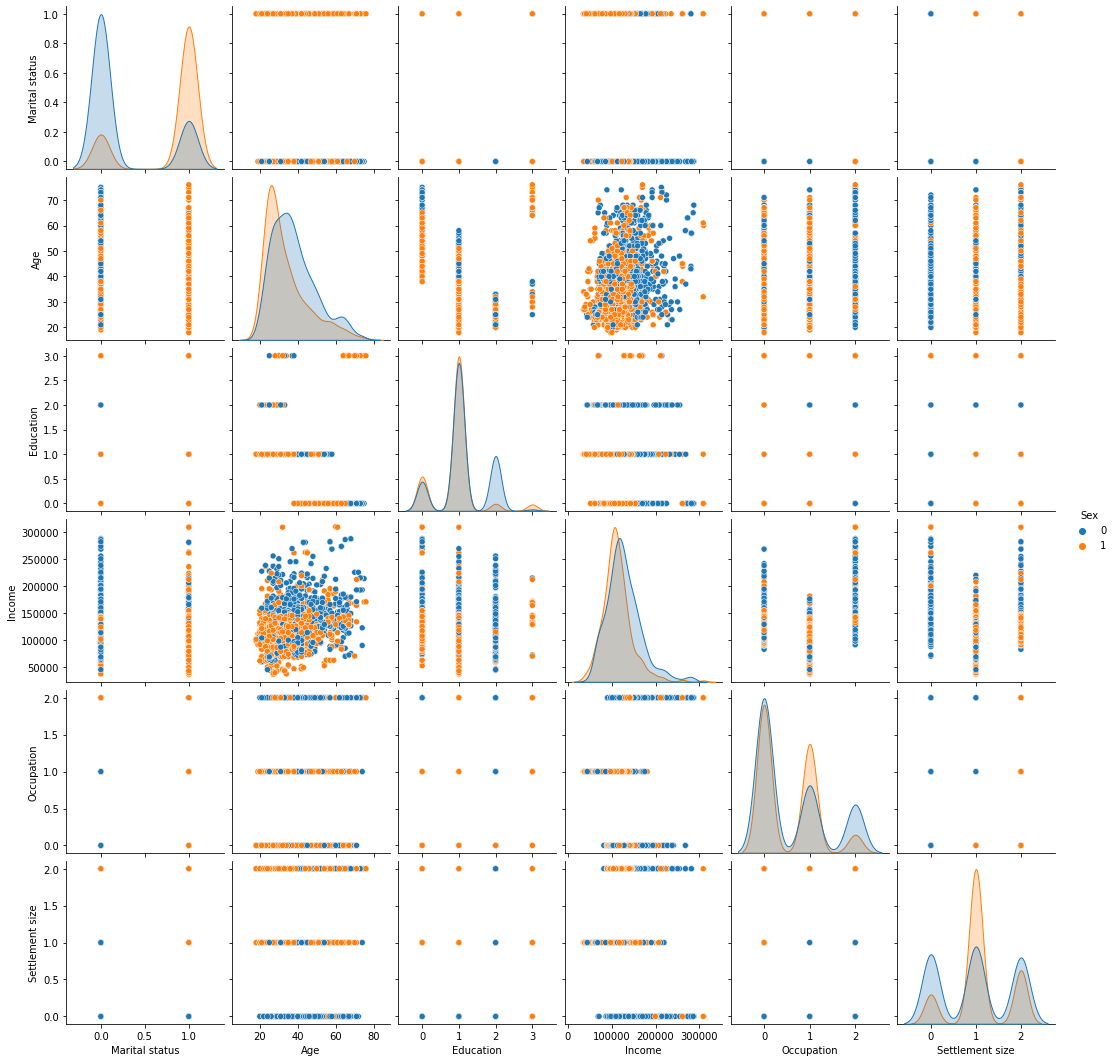

In [20]:
c1.pairplot()

In [21]:
df=c1.seeDataset()

In [22]:
df

Sex  Marital status  Age  Education  Income  Occupation  \
0       0               0   67          0  124670           0   
1       1               1   22          1  150773           0   
2       0               0   49          1   89210           1   
3       0               0   45          1  171565           0   
4       0               0   53          1  149031           0   
...   ...             ...  ...        ...     ...         ...   
1995    1               0   47          1  123525           1   
1996    1               1   27          1  117744           0   
1997    0               0   31          2   86400           1   
1998    1               1   24          1   97968           1   
1999    0               0   25          2   68416           1   

      Settlement size Age_Group  
0                   0     60-80  
1                   0     20-40  
2                   1     40-60  
3                   2     40-60  
4                   2     40-60  
...               ...       ...  
1995                1     40-60  
1996                1     20-40  
1997                1     20-40  
1998                1     20-40  
1999                1     20-40  

[2000 rows x 8 columns]

In [23]:
df=c1.DropColumn("Age_Group")

In [24]:
df

Sex  Marital status  Age  Education  Income  Occupation  Settlement size
0       0               0   67          0  124670           0                0
1       1               1   22          1  150773           0                0
2       0               0   49          1   89210           1                1
3       0               0   45          1  171565           0                2
4       0               0   53          1  149031           0                2
...   ...             ...  ...        ...     ...         ...              ...
1995    1               0   47          1  123525           1                1
1996    1               1   27          1  117744           0                1
1997    0               0   31          2   86400           1                1
1998    1               1   24          1   97968           1                1
1999    0               0   25          2   68416           1                1

[2000 rows x 7 columns]

# Principal Component Analysis 

Convert [Sex,Marital status,Age,Education,Income,Occupation,Settlement size] into 2 Dimension(Features) for Better visualization


In [25]:
X_pca=c1.PCA(df,2)

In [26]:
c1.Iteration=10

# Clustering 

In [27]:
for i in range(1,c1.Iteration):
    c1.OptimialCluster(i,X_pca)

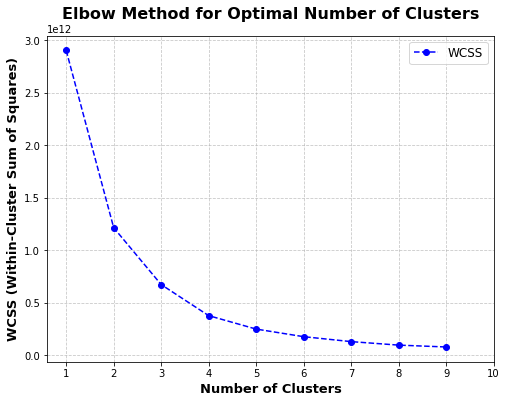

In [28]:
c1.ElbowMethod()

# From Elbow Method we Can Delivered That 6 Numbers of Clusters are Optimial

# 1 (KMean Clustering)

In [78]:
labels=c1.ApplyKMeanClustering(6,X_pca)

In [79]:
c1.PCA_2D_Scatter_Plot(X_pca,labels,"KMean Clustering")

## 2) DBSCAN

In [80]:
labels=c1.DBSCAN(X_pca)

In [81]:
c1.PCA_2D_Scatter_Plot(X_pca,labels,"DBSCAN")

# 3) Agglomerative Clustering

In [82]:
labels=c1.AgglomerativeClustering(X_pca,6)

In [83]:
c1.PCA_2D_Scatter_Plot(X_pca,labels,"Agglomerative Clustering")

# 4) Mean-Shift Clustering

In [84]:
labels=c1.MeanShift(X_pca)

In [85]:

c1.PCA_2D_Scatter_Plot(X_pca,labels,"Mean-Shift Clustering")

# 5) Gaussian Mixture Model

In [76]:
labels=c1.GaussianMixture(X_pca,6)

In [77]:

c1.PCA_2D_Scatter_Plot(X_pca,labels,"Gaussian Mixture")

# 6) Spectral Clustering

In [39]:
labels=c1.SpectralClustering(X_pca,6)

/opt/anaconda3/envs/mlp/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



In [40]:

c1.PCA_2D_Scatter_Plot(X_pca,labels,"Spectral Clustering")

# PCA with 3 Features

In [41]:
X_pca=c1.PCA(df,3)

In [42]:
X_pca

Principal Component 1  Principal Component 2  Principal Component 3
0               3715.584239              30.717048               0.435726
1              29818.579376             -17.041202               0.152531
2             -31744.417451              16.423733               0.541926
3              50610.581673               3.790313              -0.952105
4              28076.582635              14.149379              -0.901224
...                     ...                    ...                    ...
1995            2570.582148              10.822424               0.252593
1996           -3210.419919              -8.579567              -0.514071
1997          -34554.419324              -1.298365               0.759214
1998          -22986.420121              -9.500738               0.088955
1999          -52538.419853              -5.411627               0.804632

[2000 rows x 3 columns]

In [43]:
c1.Iteration=10

In [44]:
for i in range(1,c1.Iteration):
    c1.OptimialCluster(i,X_pca)

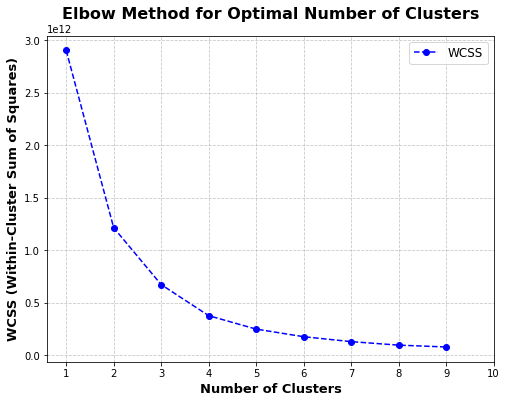

In [45]:
c1.ElbowMethod()

# 1) KMean Clustering

In [46]:
labels=c1.ApplyKMeanClustering(6,X_pca)

In [47]:
c1.PCA_3D_Scatter_Plot(X_pca,labels,"KMean Clustering")

# 2) DBSCAN

In [48]:
labels=c1.DBSCAN(X_pca)

In [49]:
c1.PCA_3D_Scatter_Plot(X_pca,labels,"DBSCAN")

# 3) AgglomerativeClustering

In [50]:
labels=c1.AgglomerativeClustering(X_pca,6)

In [51]:
c1.PCA_3D_Scatter_Plot(X_pca,labels,"AgglomerativeClustering")

# 4) MeanShift

In [52]:
labels=c1.MeanShift(X_pca)

In [53]:
c1.PCA_3D_Scatter_Plot(X_pca,labels,"Mean Shift")

# 5) Gaussian Mixture Model

In [54]:
labels=c1.GaussianMixture(X_pca,6)

In [55]:
c1.PCA_3D_Scatter_Plot(X_pca,labels,"GaussianMixture")

# 6) Spectral Clustering

In [56]:
labels=c1.SpectralClustering(X_pca,6)

/opt/anaconda3/envs/mlp/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



In [57]:
c1.PCA_3D_Scatter_Plot(X_pca,labels,"Spectral Clustering")

# Fitting Class Declaration

In [58]:
class Fitting:
    def exp_fit(self,x, a, b):
        """ This is Exponential Fit Function
        Parameters:
        ----------
        X: It is A numpy Array
        a,b:These are Paramters That Define How Curve fit the Data
        """
        return a * np.exp(b * x)

    # Define the logarithmic function for fitting
    def log_fit(self,x, a, b):
        """
        This is Logarithmic Fit Function
        Parameters:
        ----------
        X: It is A numpy Array
        a,b:These are Paramters That Define How Curve fit the Data
        Notes:
        -----
         Avoid log(0) by adding 1
        """
        
        return a * np.log(x + 1) + b 

    def poly_fit(self,x, a, b, c):
        """
        This is Polynomial Function 2 degree
        Parameters:
        ----------
        X: It is A numpy Array
        a,b,c:These are Paramters That Define How Curve fit the Data
        """
        
        
        return a * x**2 + b * x + c
    def linear_fit(self,x, m, c):
        """
        This is linear Function 
        Parameters:
        ----------
        X: It is A numpy Array
        m,c:These are Paramters That Define How Curve fit the Data
        """
        return m * x + c

    def gauss_fit(self,x, a, b, c):
        """
        This is Gaussian Function 
        Parameters:
        ----------
        X: It is A numpy Array
        a,b,c:These are Paramters That Define How Curve fit the Data"""
        return a * np.exp(-(x - b)**2 / (2 * c**2))
    
    def Scatter_Fitting_plot(self,x_data, y_data, fit_data, fit_label, title,X_labelname=None,Y_label_name=None):
        """
        This is Method plot Scatter Plot .
        Parameters:
        ----------
        x-data:Numpy Array
        y_data:Numpy Array
        fitdata:Points for fitting
        label,title (Str): Define Label and Title for Plot
    
        """
        plt.figure(figsize=(10, 6))
        
        plt.scatter(x_data, y_data, label='Actual Data', color='blue', s=10)

        plt.plot(x_data, fit_data, label=fit_label,color='red')
        plt.xlabel(X_labelname,fontsize=13,weight='bold')
        plt.ylabel(Y_label_name,fontsize=13,weight='bold')
        plt.title(title,fontsize=13,weight='bold',loc="center")
        plt.xticks(fontsize=13,weight='bold')
        plt.yticks(fontsize=13,weight='bold')
        plt.legend()
        plt.show()

    
    

In [59]:
F1=Fitting()

In [60]:
X_pca

Principal Component 1  Principal Component 2  Principal Component 3
0               3715.584239              30.717048               0.435726
1              29818.579376             -17.041202               0.152531
2             -31744.417451              16.423733               0.541926
3              50610.581673               3.790313              -0.952105
4              28076.582635              14.149379              -0.901224
...                     ...                    ...                    ...
1995            2570.582148              10.822424               0.252593
1996           -3210.419919              -8.579567              -0.514071
1997          -34554.419324              -1.298365               0.759214
1998          -22986.420121              -9.500738               0.088955
1999          -52538.419853              -5.411627               0.804632

[2000 rows x 3 columns]

In [61]:
df=c1.seeDataset()

In [62]:
df

Sex  Marital status  Age  Education  Income  Occupation  Settlement size
0       0               0   67          0  124670           0                0
1       1               1   22          1  150773           0                0
2       0               0   49          1   89210           1                1
3       0               0   45          1  171565           0                2
4       0               0   53          1  149031           0                2
...   ...             ...  ...        ...     ...         ...              ...
1995    1               0   47          1  123525           1                1
1996    1               1   27          1  117744           0                1
1997    0               0   31          2   86400           1                1
1998    1               1   24          1   97968           1                1
1999    0               0   25          2   68416           1                1

[2000 rows x 7 columns]

# Linear Fit

In [63]:

params_linear, _ = curve_fit(F1.linear_fit, df['Age'], df['Income'], p0=[1, 1])
linear_fit_data = F1.linear_fit(df['Age'], *params_linear)



# Exponential Fit

In [64]:

params_exponential, _ = curve_fit(F1.exp_fit, df['Age'], df['Income'], p0=[1, 0.01])
exponential_fit_data = F1.exp_fit(df['Age'], *params_exponential)



# Polynomial Fit (2nd degree)

In [65]:

params_polynomial, _ = curve_fit(F1.poly_fit, df['Age'], df['Income'], p0=[1, 1, 1])
polynomial_fit_data = F1.poly_fit(df['Age'], *params_polynomial)



# Logarithmic Fit

In [66]:

params_logarithmic, _ = curve_fit(F1.log_fit, df['Age'], df['Income'], p0=[1, 1])
logarithmic_fit_data = F1.log_fit(df['Age'], *params_logarithmic)



# Gaussian Fit

In [67]:

params_gaussian, _ = curve_fit(F1.gauss_fit, df['Age'], df['Income'], p0=[1, 30, 5])  
gaussian_fit_data = F1.gauss_fit(df['Age'], *params_gaussian)
params_linear, _ = curve_fit(F1.linear_fit, df['Age'], df['Income'], p0=[1, 1])
linear_fit_data = F1.linear_fit(df['Age'], *params_linear)


# Plot Linear Fit

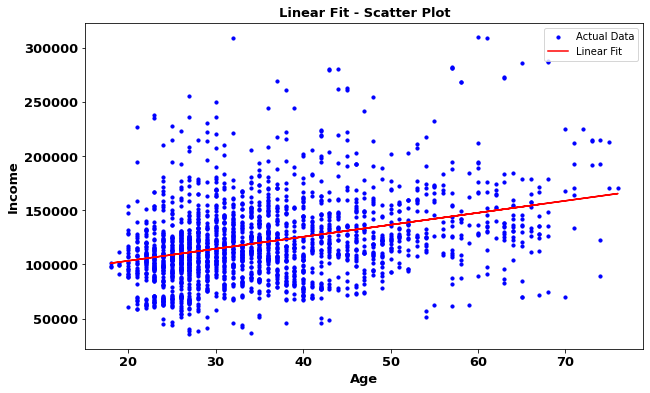

In [68]:
F1.Scatter_Fitting_plot(df['Age'], df['Income'], linear_fit_data, "Linear Fit", "Linear Fit - Scatter Plot","Age","Income")

# Plot Exponential Fit

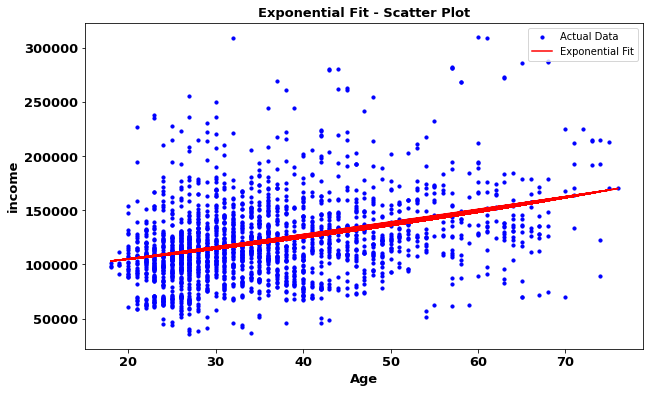

In [69]:
F1.Scatter_Fitting_plot(df['Age'], df['Income'], exponential_fit_data, "Exponential Fit", "Exponential Fit - Scatter Plot","Age","income")

# Plot Polynomial Fit

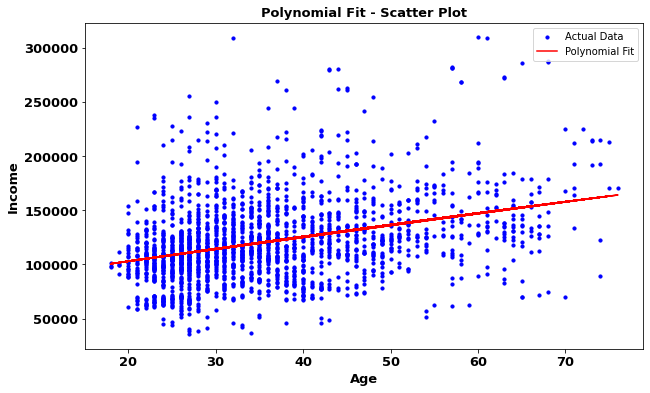

In [70]:
F1.Scatter_Fitting_plot(df['Age'], df['Income'], polynomial_fit_data, "Polynomial Fit", "Polynomial Fit - Scatter Plot","Age","Income")

# Plot Logarithmic Fit

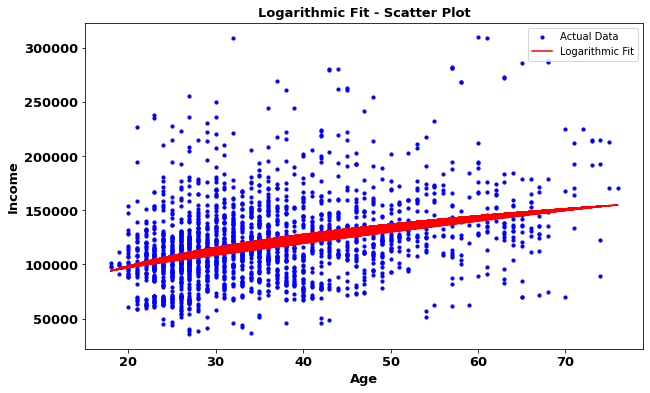

In [71]:
F1.Scatter_Fitting_plot(df['Age'], df['Income'], logarithmic_fit_data, "Logarithmic Fit", "Logarithmic Fit - Scatter Plot","Age","Income")

# Plot Gaussian Fit

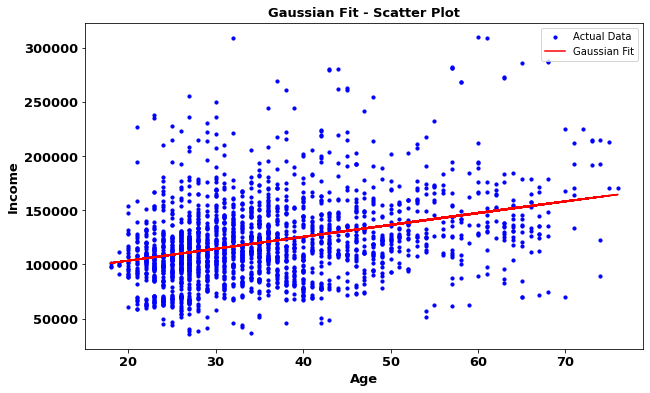

In [72]:
F1.Scatter_Fitting_plot(df['Age'], df['Income'], gaussian_fit_data, "Gaussian Fit", "Gaussian Fit - Scatter Plot","Age","Income")